## Trend lines with NumPy and  PyPlot

Drawing a trend line generally means fitting a [polynomial](http://www.mathsisfun.com/algebra/polynomials.html) function on the time series. We already know how to do this!

Let's review with data taken from [google trends](www.trends.google.com).

First, let's get our data loaded in and do some re-organizing. It's easiest if the data is **evenly spaced**, and retains an **incremental integer index**. Luckily, our data follows those guidelines, but if it didn't, at this point you should use Pandas to resample and reindex.

In [5]:
import pandas as pd
from datetime import timedelta
%pylab inline

# Import the data
df = pd.read_csv('/Users/ajbentley/GA-DSI/curriculum/week-12/1.2-autocorrelation/\
assets/datasets/mapquest_google_trends.csv')

# Clean/Organize the data. NOTE: for this stage, look for evenly spaced data with an incremental integer index.
df.columns = ['WeekOf', 'Hits']
df.head()

Populating the interactive namespace from numpy and matplotlib


,WeekOf,Hits
0,2004-01-04,53
1,2004-01-11,53
2,2004-01-18,54
3,2004-01-25,53
4,2004-02-01,52


Great! Now, let's plot the data.

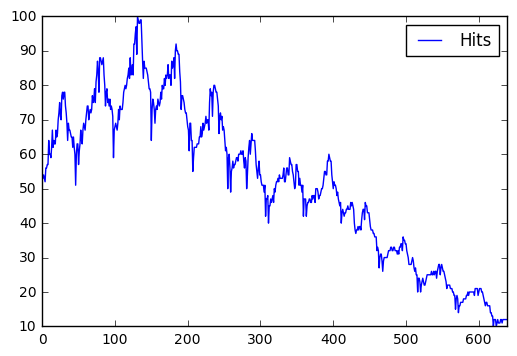

In [6]:
df.plot()

Next we need to compute a coefficient and intercept for our line.

NumPy's `polyfit` method can do this. Let's look at the documentation [here](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html) and implement it.

In [7]:
line_coef = np.polyfit(df.index,df.Hits,1)
line_coef

array([ -0.10841388,  86.58979622])

Finally, define our polynomial function using that coefficient. We can do this on a single dimension using NumPy's `poly1d` method.

In [8]:
polynomial = np.poly1d(line_coef)

Ok, let's plot it!

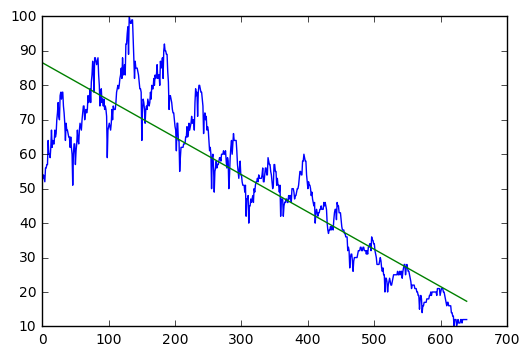

In [9]:
pyplot.plot(df.index, df.Hits, df.index, polynomial(df.index))

## Great job! You're trending.